In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [2]:
# load Dataframe
df = pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891
5,2.9,23.0,56642
6,3.0,23.0,60150
7,3.2,23.3,54445
8,3.2,23.3,64445
9,3.7,23.6,57189


In [3]:
X = df.drop(columns=['Salary'], axis=1)  # Dataframe type
y = df[['Salary']]                       # Dataframe type

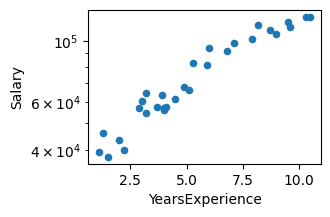

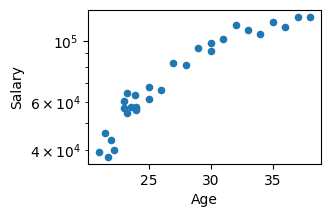

In [4]:
ax1 = df.plot.scatter(x="YearsExperience", y="Salary", figsize=(3, 2))
ax2 = df.plot.scatter(x="Age", y="Salary", figsize=(3, 2))

ax1.set_yscale('log')
ax2.set_yscale('log')

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scalerX = StandardScaler()
scalery = StandardScaler()

X_train_scaled = scalerX.fit_transform(X_train)   # The first time is used fit_transform(), but later, only transform()
y_train_scaled = scalery.fit_transform(y_train)   # Also, both scalers are designed/defined with the train samples.

In [7]:
# Now, we can fit our model
model = LinearRegression(n_jobs=-1)
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(n_jobs=-1)

In [8]:
# model score
model_score = model.score(X_train_scaled, y_train_scaled)
print(f'model_score = {round(model_score*100, 1)}%')

model_score = 97.0%


In [9]:
# Performing cross validation for obtaining a more confidence value for model score

from sklearn.model_selection import cross_val_score

# The cross validation is applied on the training sample.
cv_score = cross_val_score(estimator=model,
                           X=X_train_scaled, y=y_train_scaled, cv=3, n_jobs=-1)

cv_score_mean = round( cv_score.mean()*100, 1 )
cv_score_std  = round( cv_score.std()*100, 1 )

print(f'({cv_score_mean} +- {cv_score_std})%')

(95.4 +- 2.6)%


In [10]:
def predicting(X):

    X_scaled = scalerX.transform(X)

    pred_scaled = model.predict(X_scaled)
    pred = scalery.inverse_transform(pred_scaled)

    return pred.astype(int)

In [11]:
y_train['pred'] =  predicting(X_train)
y_test['pred']  =  predicting(X_test)

In [12]:
def calculate_slope_and_intercept(X, y):
    """
    :param X: X_training dataset
    :param y: y_training target
    :return: List of slopes
    """

    slopes = []
    intercepts = []
    for i in range(len(X.columns)):

        x0 = X.iloc[0, i]    ;   x1 = X.iloc[1, i]
        y0 = y.pred.iloc[0]  ;   y1 = y.pred.iloc[1]

        delta_y = y1 - y0
        delta_X = x1 - x0

        slope = round( delta_y/delta_X, 2)
        intercept = round( y0 - slope*x0, 2)

        slopes.append(slope)
        intercepts.append(intercept)

    return slopes, intercepts

In [13]:
slopes, intercepts = calculate_slope_and_intercept(X_train, y_train)

In [14]:
get_x_values = lambda feature, n=100: np.linspace(feature.min(), feature.max(), n)

x_values_feature_0 = get_x_values(X.iloc[:, 0])
x_values_feature_1 = get_x_values(X.iloc[:, 1])

get_y_values = lambda slope, intercept, x_values: slope*x_values + intercept

y_values_feature_0 = get_y_values(slope=slopes[0], intercept=intercepts[0], x_values=x_values_feature_0)
y_values_feature_1 = get_y_values(slope=slopes[1], intercept=intercepts[1], x_values=x_values_feature_1)

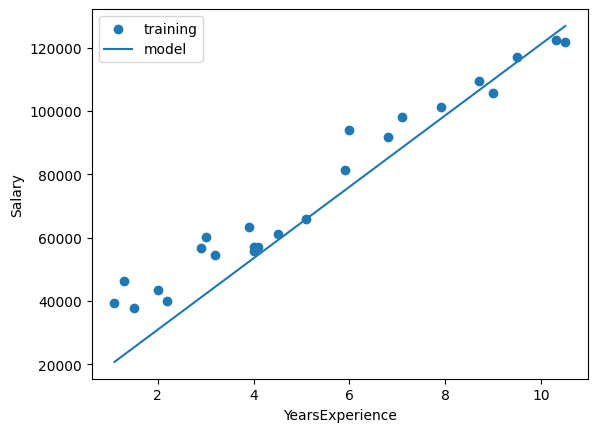

In [15]:
plt.scatter(X_train.YearsExperience, y_train.Salary, label='training')
plt.plot(x_values_feature_0, y_values_feature_0, label='model')

plt.xlabel("YearsExperience")
plt.ylabel("Salary")

plt.legend()
plt.show()

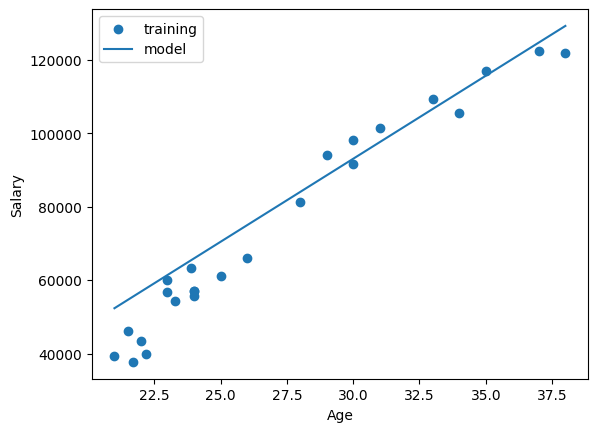

In [16]:
#ax = df.plot.scatter(x="Age", y="Salary", label='training')
plt.scatter(X_train.Age, y_train.Salary, label='training')
plt.plot(x_values_feature_1, y_values_feature_1, label='model')

plt.xlabel("Age")
plt.ylabel("Salary")

plt.legend()
plt.show()

We can observe that the fit on both individual plots seems not be good enough; For YearsExperience vs. Salary,
seems that the model curve is lower, while for Age vs. Salary seems that the curve is higher.
This is happening because the fit is simultaneous on the two features and these plots are projection of the model (3D-line)

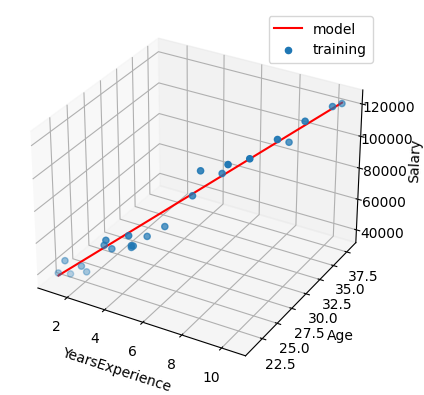

In [17]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1_list = list(X_train.YearsExperience)
x2_list = list(X_train.Age)
x3_list = list(y_train.Salary)

# Define the line points
line_x = [x_values_feature_0[0], x_values_feature_0[-1]]
line_y = [x_values_feature_1[0], x_values_feature_1[-1]]
line_z = [y_train.Salary.min(), y_train.Salary.max()]

ax.plot(line_x, line_y, line_z, c='r', label='model')
ax.scatter(x1_list, x2_list, x3_list, label='training')

# Set labels
ax.set_xlabel('YearsExperience')
ax.set_ylabel('Age')
ax.set_zlabel('Salary')

plt.legend()
plt.show()